# Model Training
Model Training and Evaluation

Having preprocessed the data and saved it to a CSV file, the next step is to build and evaluate various models. This section outlines the approach for model training, evaluation, and feature importance analysis to ensure we achieve the best model for predicting insurance claims.

The objective of this report is to document the complete process of training, evaluating, and interpreting machine learning models for predicting car insurance claims. The preprocessed dataset (created in a previous step) was used to train various models, and each model was evaluated based on relevant metrics to identify the best-performing one. Additionally, SHAP analysis was used to explain feature importance and model predictions.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
import warnings
warnings.filterwarnings("ignore", message="")

1. Train-Test Split
Implementation Steps:

Load the Data:

Import the preprocessed dataset from the CSV file.

2. Divide the Data:

Use `train_test_split` from `scikit-learn` to split the data into training and test sets.

In [2]:
# Load the preprocessed data
df = pd.read_csv('../data/preprocessed_data.csv')

# Define features and target variable
X = df.drop(columns=['TotalPremium'])
y = df['TotalPremium']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

To ensure that the model generalizes well to unseen data, the dataset was split into training and test sets. Typically, the split is done in either a 70:30 or 80:20 ratio.

- Train Set: Used to train the model.
- Test Set: Used to evaluate model performance on unseen data.

2. Modeling Techniques

Model Training Techniques

The following machine learning models were trained using the training data:

- Linear Regression: A baseline regression model that assumes a linear relationship between the features and the target.
- Decision Tree: A non-linear model that learns simple decision rules inferred from the data.
- Random Forest: An ensemble model that combines multiple decision trees to improve prediction accuracy and generalization.
- XGBoost: A powerful boosting algorithm that iteratively improves model performance by focusing on difficult-to-predict samples.

Linear Regression:

In [3]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

Decision Tree

In [4]:
# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

Random Forests:

In [5]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

XGBoost

In [6]:
# Initialize and train the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

Model Evaluation Metrics

Each model was evaluated on the test set using several metrics:

- Mean Squared Error (MSE): Measures the average squared difference between the predicted and actual values.
- R-Squared (R²): A statistical measure that explains the proportion of variance in the target variable explained by the model.

In [7]:
# Evaluation metrics
metrics = {
    'Linear Regression': {'MSE': mse_lr, 'R2': r2_lr},
    'Decision Tree': {'MSE': mse_dt, 'R2': r2_dt},
    'Random Forest': {'MSE': mse_rf, 'R2': r2_rf},
    'XGBoost': {'MSE': mse_xgb, 'R2': r2_xgb}
}


In [8]:
pd.DataFrame(metrics).T

,MSE,R2
Linear Regression,280.714737,0.417132
Decision Tree,251.763947,0.477244
Random Forest,251.731428,0.477312
XGBoost,262.501044,0.454950


From the table, we see that Random Forest and Decision Tree models have similar performance and outperform the linear model.

**Model Comparison Using Graphs**

To compare the models visually, we can plot the predicted vs. actual values for each model.

/home/noh/10Academy/Car-Insurance-Risk-Analysis-and-Premium-Optimization/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


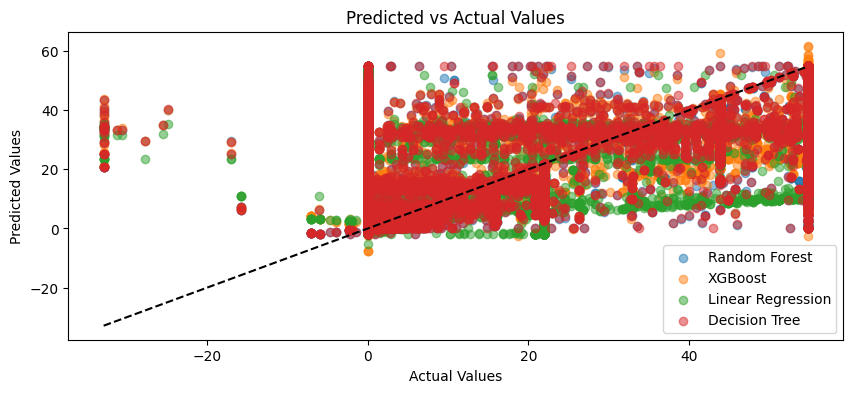

In [9]:
# Plot predictions vs actual values
plt.figure(figsize=(10,4))
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.5)
plt.scatter(y_test, y_pred_xgb, label='XGBoost', alpha=0.5)
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_dt, label='Decision Tree', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Predicted vs Actual Values')
plt.show()


**Feature Importance Analysis**

Understanding which features have the most influence on the model is crucial for interpreting its predictions. Feature importance can be analyzed using:

- SHAP (SHapley Additive exPlanations): A technique that explains the contribution of each feature to the predictions.

- LIME (Local Interpretable Model-agnostic Explanations): A method that explains individual predictions locally.

/home/noh/10Academy/Car-Insurance-Risk-Analysis-and-Premium-Optimization/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


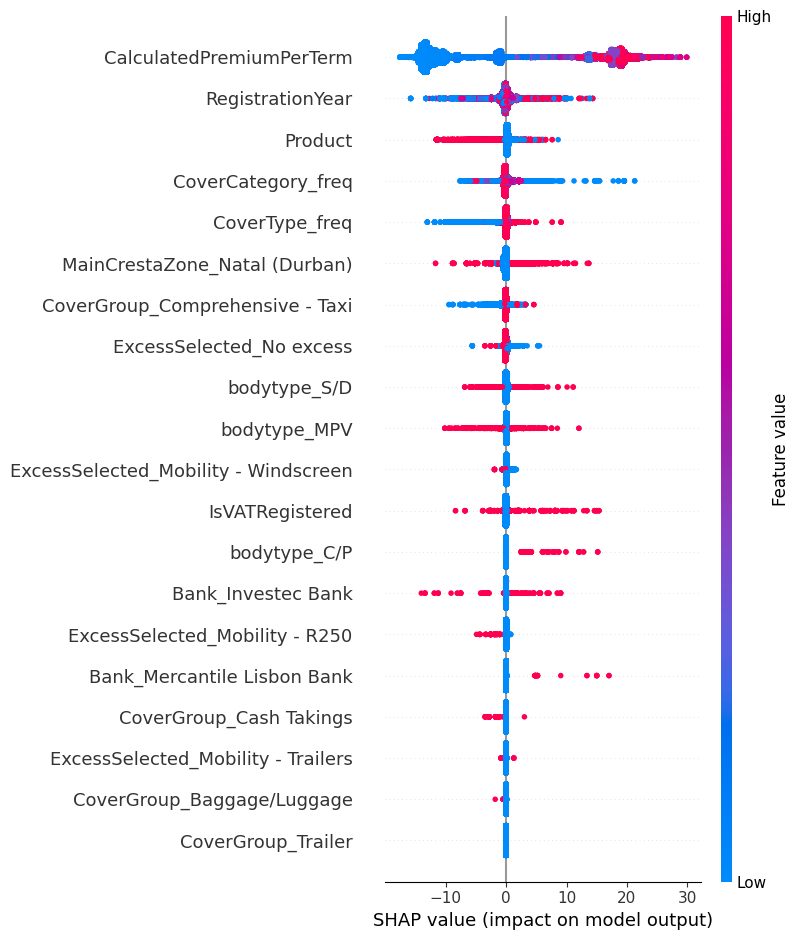

In [10]:
import shap

# Initialize SHAP explainer for XGBoost
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# Plot SHAP values
shap.summary_plot(shap_values, X_test)


In [11]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize LIME explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    mode='regression'
)

# Explain predictions for a sample instance
i = 0  # index of the instance to explain
exp = lime_explainer.explain_instance(X_test.iloc[i].values, xgb_model.predict)
exp.show_in_notebook(show_table=True, show_all=False)
